In [1]:
import pandas as pd
import csv
from datasets import Dataset, load_from_disk, load_dataset_builder, load_dataset, DatasetDict

In [2]:
# Offer_retailer_brands table
offer_df = pd.read_csv("../data/raw/offer_retailer.csv")
print(offer_df.head())
print(offer_df.info())
print(offer_df.describe())

                                               OFFER            RETAILER  \
0     Spend $50 on a Full-Priced new Club Membership           SAMS CLUB   
1       Beyond Meat® Plant-Based products, spend $25                 NaN   
2           Good Humor Viennetta Frozen Vanilla Cake                 NaN   
3  Butterball, select varieties, spend $10 at Dil...  DILLONS FOOD STORE   
4  GATORADE® Fast Twitch®, 12-ounce 12 pack, at A...              AMAZON   

         BRAND  
0    SAMS CLUB  
1  BEYOND MEAT  
2   GOOD HUMOR  
3   BUTTERBALL  
4     GATORADE  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   OFFER     384 non-null    object
 1   RETAILER  238 non-null    object
 2   BRAND     384 non-null    object
dtypes: object(3)
memory usage: 9.1+ KB
None
                                                    OFFER RETAILER  \
count                           

In [3]:
print(offer_df[["BRAND", "OFFER"]].describe())

                       BRAND  \
count                    384   
unique                   144   
top     CASEYS GENERAL STORE   
freq                      26   

                                                    OFFER  
count                                                 384  
unique                                                376  
top     GATORADE® Fast Twitch®, 12-ounce single serve,...  
freq                                                    2  


In [4]:
# Brands_Category table
brand_df = pd.read_csv("../data/raw/brand_category.csv")
print(brand_df.head())
print(brand_df.info())
print(brand_df.describe())

              BRAND BRAND_BELONGS_TO_CATEGORY  RECEIPTS
0  CASEYS GEN STORE          Tobacco Products   2950931
1  CASEYS GEN STORE                    Mature   2859240
2            EQUATE              Hair Removal    893268
3         PALMOLIVE               Bath & Body    542562
4              DAWN               Bath & Body    301844
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9906 entries, 0 to 9905
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   BRAND                      9905 non-null   object
 1   BRAND_BELONGS_TO_CATEGORY  9906 non-null   object
 2   RECEIPTS                   9906 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 232.3+ KB
None
           RECEIPTS
count  9.906000e+03
mean   1.894300e+03
std    4.318618e+04
min    1.100000e+01
25%    2.500000e+01
50%    7.100000e+01
75%    3.427500e+02
max    2.950931e+06


In [5]:
brand_df[pd.isna(brand_df["BRAND"])]

,BRAND,BRAND_BELONGS_TO_CATEGORY,RECEIPTS
6624,NaN,Beer,33


In [6]:
# Removed NaN brands
brand_df.dropna(inplace=True)
brand_df[pd.isna(brand_df["BRAND"])]

,BRAND,BRAND_BELONGS_TO_CATEGORY,RECEIPTS


In [7]:
print(brand_df[["BRAND", "BRAND_BELONGS_TO_CATEGORY"]].describe())

       BRAND BRAND_BELONGS_TO_CATEGORY
count   9905                      9905
unique  8521                       118
top     GOYA                      Beer
freq      29                      2142


In [8]:
# Check Unique Brands
brand_set1 = set(brand_df["BRAND"].tolist())
brand_set2 = set(offer_df["BRAND"].tolist())
print("Brands in brands_df: ", len(brand_set1))
print("Brands in offer_df: ", len(brand_set2))
print("Unique Brands Total:", len(brand_set1.union(brand_set2)))
print("Unique Brands with offers:", len(brand_set1.intersection(brand_set2)))
print("Unique Brands without offers:", len(brand_set1.difference(brand_set2)))
print("Unique Offers without known brands:", len(brand_set2.difference(brand_set1)))

Brands in brands_df:  8521
Brands in offer_df:  144
Unique Brands Total: 8543
Unique Brands with offers: 122
Unique Brands without offers: 8399
Unique Offers without known brands: 22


In [41]:
# Category table
cat_df = pd.read_csv("../data/raw/categories.csv")
print(cat_df.head())
print(cat_df.info())
print(cat_df.describe())

                            CATEGORY_ID             PRODUCT_CATEGORY  \
0  1f7d2fa7-a1d7-4969-aaf4-1244f232c175              Red Pasta Sauce   
1  3e48a9b3-1ab2-4f2d-867d-4a30828afeab  Alfredo & White Pasta Sauce   
2  09f3decc-aa93-460d-936c-0ddf06b055a3             Cooking & Baking   
3  12a89b18-4c01-4048-94b2-0705e0a45f6b             Packaged Seafood   
4  2caa015a-ca32-4456-a086-621446238783             Feminine Hygeine   

  IS_CHILD_CATEGORY_TO  
0          Pasta Sauce  
1          Pasta Sauce  
2               Pantry  
3               Pantry  
4    Health & Wellness  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CATEGORY_ID           118 non-null    object
 1   PRODUCT_CATEGORY      118 non-null    object
 2   IS_CHILD_CATEGORY_TO  118 non-null    object
dtypes: object(3)
memory usage: 2.9+ KB
None
                  

In [10]:
# Merge brand and category table
brand_category_df = pd.merge(brand_df, cat_df, left_on="BRAND_BELONGS_TO_CATEGORY", right_on="PRODUCT_CATEGORY")
brand_category_df.head()

,BRAND,BRAND_BELONGS_TO_CATEGORY,RECEIPTS,CATEGORY_ID,PRODUCT_CATEGORY,IS_CHILD_CATEGORY_TO
0,CASEYS GEN STORE,Tobacco Products,2950931,4442fa51-d4b7-4d56-ad7c-d18cfd2aff84,Tobacco Products,Mature
1,RJ REYNOLDS VAPOR,Tobacco Products,21,4442fa51-d4b7-4d56-ad7c-d18cfd2aff84,Tobacco Products,Mature
2,CASEYS GEN STORE,Mature,2859240,f81d7064-52da-4bd7-98eb-7a14be267720,Mature,Mature
3,EQUATE,Hair Removal,893268,539953fe-50bf-4a00-8a21-c64752d6ed7e,Hair Removal,Health & Wellness
4,BARBASOL,Hair Removal,283926,539953fe-50bf-4a00-8a21-c64752d6ed7e,Hair Removal,Health & Wellness


In [11]:
# Check Popularity of Brands and Categories
parent_cat_df = brand_category_df[["RECEIPTS", "IS_CHILD_CATEGORY_TO"]].groupby(["IS_CHILD_CATEGORY_TO"]).sum().sort_values(by=["RECEIPTS"], ascending=False)
parent_cat_df

,RECEIPTS
IS_CHILD_CATEGORY_TO,
Mature,5810192
Health & Wellness,4162256
Alcohol,2458470
Beverages,1529301
Snacks,1446196
Pantry,1193462
Deli & Bakery,506289
Household Supplies,367779
Frozen,332468


In [12]:
# Merge Offer and Brands Tables
brand_offer_df = pd.merge(offer_df,brand_df, on="BRAND", how="left")
brand_offer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER                      826 non-null    object 
 1   RETAILER                   398 non-null    object 
 2   BRAND                      826 non-null    object 
 3   BRAND_BELONGS_TO_CATEGORY  776 non-null    object 
 4   RECEIPTS                   776 non-null    float64
dtypes: float64(1), object(4)
memory usage: 32.4+ KB


In [15]:
# Create a new table with product category and their related categories
new_categories = []
for parent_category, group in cat_df.groupby("IS_CHILD_CATEGORY_TO"):
    sister_products = ", ".join(group["PRODUCT_CATEGORY"])
    new_categories.append([parent_category, sister_products])

new_categories = pd.DataFrame(new_categories, columns=["product_category", "RELATED_CAT"])
new_categories.head()

,product_category,RELATED_CAT
0,Alcohol,"Beer, Malt Beverages, Hard Seltzers, Sodas, Wa..."
1,Animals & Pet Supplies,Dog Supplies
2,Baby & Toddler,"Baby Bathing, Potty Training, Baby Safety, Dia..."
3,Beauty,"Cosmetic Tools, Makeup, Nail Care, Body Fragra..."
4,Beverages,"Coffee, Meal Replacement Beverages, Vegetable ..."


In [16]:
cat_related_df = pd.merge(cat_df, new_categories, left_on="IS_CHILD_CATEGORY_TO", right_on="product_category", how="left").drop(columns=["CATEGORY_ID","product_category"]) 
cat_related_df

,PRODUCT_CATEGORY,IS_CHILD_CATEGORY_TO,RELATED_CAT
0,Red Pasta Sauce,Pasta Sauce,"Red Pasta Sauce, Alfredo & White Pasta Sauce, ..."
1,Alfredo & White Pasta Sauce,Pasta Sauce,"Red Pasta Sauce, Alfredo & White Pasta Sauce, ..."
2,Cooking & Baking,Pantry,"Cooking & Baking, Packaged Seafood, Nut Butter..."
3,Packaged Seafood,Pantry,"Cooking & Baking, Packaged Seafood, Nut Butter..."
4,Feminine Hygeine,Health & Wellness,"Feminine Hygeine, Sexual Health, Foot Care, De..."
...,...,...,...
113,Frozen Turkey,Frozen Meat,"Frozen Turkey, Frozen Chicken, Frozen Beef, Fr..."
114,Frozen Chicken,Frozen Meat,"Frozen Turkey, Frozen Chicken, Frozen Beef, Fr..."
115,Frozen Beef,Frozen Meat,"Frozen Turkey, Frozen Chicken, Frozen Beef, Fr..."
116,Frozen Seafood,Frozen Meat,"Frozen Turkey, Frozen Chicken, Frozen Beef, Fr..."


In [17]:
# Function to clean the text string and removing special characters.
def clean_text(text):
    import re
    text = str(text).lower()
    text = re.sub('[-]+',' ', text)
    text = re.sub('[^A-Za-z0-9\[\]\s]+', '', text)   
    #text = text.strip()
    return text

In [18]:
# Get Brand category and the Parent category data
brand_cat_par_cat = brand_df.merge(cat_df, left_on="BRAND_BELONGS_TO_CATEGORY", right_on="PRODUCT_CATEGORY", how="left")[["BRAND", "PRODUCT_CATEGORY", "IS_CHILD_CATEGORY_TO"]]
brand_cat_par_cat.head()

,BRAND,PRODUCT_CATEGORY,IS_CHILD_CATEGORY_TO
0,CASEYS GEN STORE,Tobacco Products,Mature
1,CASEYS GEN STORE,Mature,Mature
2,EQUATE,Hair Removal,Health & Wellness
3,PALMOLIVE,Bath & Body,Health & Wellness
4,DAWN,Bath & Body,Health & Wellness


In [19]:
brand_cat_par_cat.describe()

,BRAND,PRODUCT_CATEGORY,IS_CHILD_CATEGORY_TO
count,9905,9905,9905
unique,8521,118,23
top,GOYA,Beer,Alcohol
freq,29,2142,6241


In [20]:
all_cat_list = brand_cat_par_cat["PRODUCT_CATEGORY"].unique().tolist()

In [22]:
# Prepare synthetic pairs of training data

offer_ext = []
all_queries = []
all_score_list = []
for index, items in offer_df.iterrows():
    #print(items)
    query_list = []
    scores = []
    offer = items["OFFER"]
    retailer = items["RETAILER"]
    brnd = items["BRAND"]
    offer_token = "[OFF] "
    brnd_token = " [BN] "
    ret_token = " [RN] "
    cat_token = " [CN] "
    par_token = " [PCN] "

    offer_str = offer_token + clean_text(offer)

    # split offer words and append as queries
    for words in clean_text(offer).split():
        query_list.append(words)
        scores.append(100)
    
    #split if retailer present and append as queries
    if brnd != "" and not pd.isna(brnd):
        if len(brnd.split()) > 1:
            for words in brnd.split():
                query_list.append(clean_text(words))
                scores.append(100)
        else:
            query_list.append(clean_text(brnd))
            scores.append(100)
        offer_str += brnd_token + clean_text(brnd)
        
        # Fetch categories of that brand
        cat_list = brand_cat_par_cat[brand_cat_par_cat["BRAND"] == brnd]["PRODUCT_CATEGORY"].tolist()
        par_cat_list = brand_cat_par_cat[brand_cat_par_cat["BRAND"] == brnd]["IS_CHILD_CATEGORY_TO"].tolist()        
        
        # For all fetched categories and parent categories, add to offer string and find not related categories 
        if len(cat_list) > 0:
            for cat in cat_list:
                if cat != "" and not pd.isna(cat):
                    if len(cat.split()) > 1:
                        for words in cat.split():
                            query_list.append(clean_text(words))
                            scores.append(90)
                    else:
                        query_list.append(clean_text(cat))
                        scores.append(90)
                    offer_str += cat_token + clean_text(cat)
        not_rel_par_cat = []
        if len(par_cat_list) > 0:
            for cat in par_cat_list:
                if cat != "" and not pd.isna(cat) and offer_str.find(clean_text(cat)) == -1:
                    if len(cat.split()) > 1:
                        for words in cat.split():
                            query_list.append(clean_text(words))
                            scores.append(80)
                    else:
                        query_list.append(clean_text(cat))
                        scores.append(80)
                    offer_str += par_token + clean_text(cat)
            not_rel_par_cat = list(set(all_cat_list).difference(set(par_cat_list)))
        else:
            not_rel_par_cat = list(all_cat_list)

        # For all not related categories, add as NEGATIVE samples to the data.
        if len(not_rel_par_cat) > 0:
            tot_irrel_cat = len(not_rel_par_cat)
            limit = 8
            if tot_irrel_cat < limit:
                limit = tot_irrel_cat

            for cat in not_rel_par_cat[:limit]:
                if cat != "" and not pd.isna(cat) and offer_str.find(clean_text(cat)) == -1:
                    if len(cat.split()) > 1:
                        for words in cat.split():
                            query_list.append(clean_text(words))
                            scores.append(00)
                    else:
                        query_list.append(clean_text(cat))
                        scores.append(0)
                    #offer_str += par_token + cat

        #negative examples can be generated from brands!= current brand
        
        
    #split if retailer present and append as queries
    if retailer != "" and not pd.isna(retailer) and offer_str.find(clean_text(retailer)) == -1:
        if len(retailer.split()) > 1:
            for words in retailer.split():
                query_list.append(clean_text(words))
                scores.append(100)
        else:
            query_list.append(clean_text(retailer))
            scores.append(100)
        offer_str += ret_token + clean_text(retailer)
    
    #verify len of queries == len of scores

    if len(query_list) == len(scores):
        offer_ext.extend([offer_str for _ in range(len(query_list))])
        all_queries.extend(query_list)
        all_score_list.extend(scores)
    #break
print(len(offer_ext))
print(len(all_queries))
print(len(all_score_list))

11994
11994
11994


In [24]:
synthetic_data = pd.DataFrame({"offer_ext": offer_ext, "search_query": all_queries, "score": all_score_list})

In [25]:
synthetic_data.head()

,offer_ext,search_query,score
0,[OFF] spend 50 on a full priced new club membe...,spend,100
1,[OFF] spend 50 on a full priced new club membe...,50,100
2,[OFF] spend 50 on a full priced new club membe...,on,100
3,[OFF] spend 50 on a full priced new club membe...,a,100
4,[OFF] spend 50 on a full priced new club membe...,full,100


In [26]:
synthetic_data.describe()

,score
count,11994.000000
mean,46.350675
std,47.497334
min,0.000000
25%,0.000000
50%,0.000000
75%,100.000000
max,100.000000


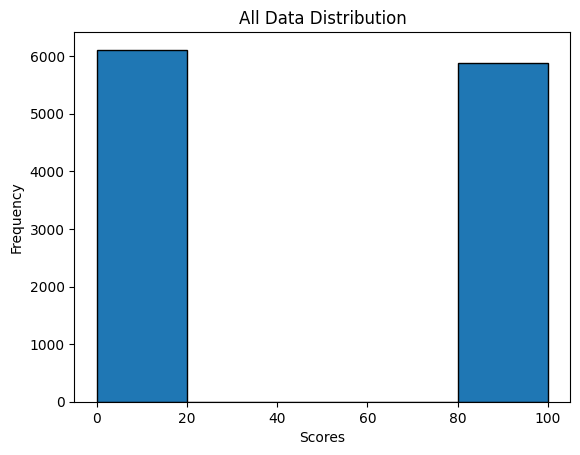

In [27]:
import matplotlib.pyplot as plt
# Create a histogram of the "Age" column
plt.hist(synthetic_data['score'], bins=5, edgecolor='k')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('All Data Distribution')
plt.show()

In [28]:
synthetic_data.to_csv("../data/processed/synthetic_pair/all_synth_data.csv",index=False)

In [29]:
# Split the Data for training
from sklearn.model_selection import train_test_split
train_ratio = 0.65
val_ratio = 0.25
test_ratio = 0.1

In [30]:
train_df, temp_df = train_test_split(synthetic_data, test_size=1 - train_ratio, random_state=42, shuffle=True)
test_df, val_df = train_test_split(temp_df, test_size=val_ratio / (val_ratio + test_ratio), random_state=42, shuffle=True)

In [31]:
print(len(train_df), len(val_df), len(test_df))

7796 2999 1199


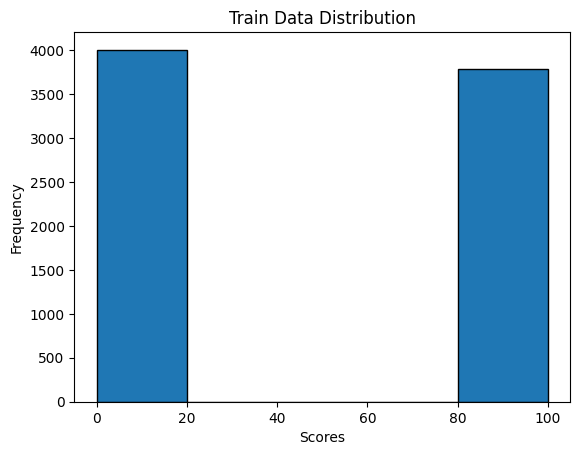

In [32]:

plt.hist(train_df['score'], bins=5, edgecolor='k')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Train Data Distribution')
plt.show()

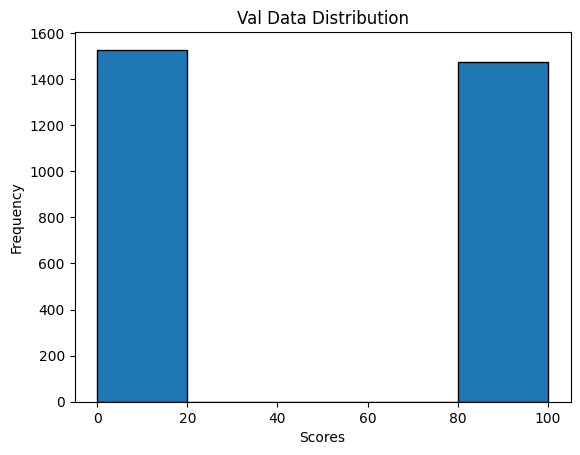

In [33]:
plt.hist(val_df['score'], bins=5, edgecolor='k')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Val Data Distribution')
plt.show()

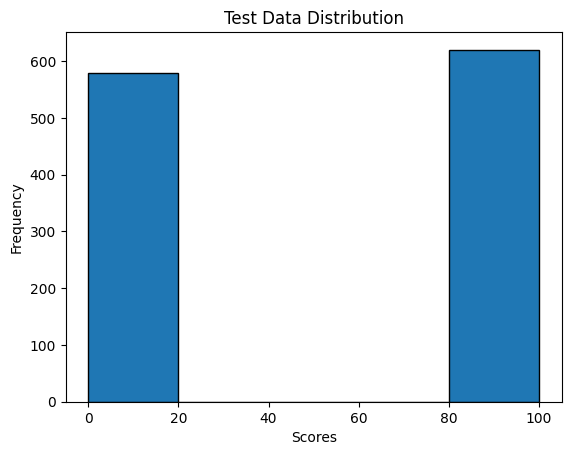

In [34]:
plt.hist(test_df['score'], bins=5, edgecolor='k')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Test Data Distribution')
plt.show()

In [35]:
final_data = DatasetDict({
    "train" : Dataset.from_pandas(train_df).remove_columns(["__index_level_0__"]),
    "val" : Dataset.from_pandas(val_df).remove_columns(["__index_level_0__"]),
    "test" : Dataset.from_pandas(test_df).remove_columns(["__index_level_0__"])
})

In [36]:
final_data

DatasetDict({
    train: Dataset({
        features: ['offer_ext', 'search_query', 'score'],
        num_rows: 7796
    })
    val: Dataset({
        features: ['offer_ext', 'search_query', 'score'],
        num_rows: 2999
    })
    test: Dataset({
        features: ['offer_ext', 'search_query', 'score'],
        num_rows: 1199
    })
})

In [37]:
# Store the prepared synthetic data
final_data.save_to_disk("../data/processed/synthetic_pair/synthetic_search_data/")

Saving the dataset (0/1 shards):   0%|          | 0/7796 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/2999 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1199 [00:00<?, ? examples/s]

In [39]:
## Check if loaded the data?
dataset_search = load_from_disk("../data/processed/synthetic_pair/synthetic_search_data/")

In [40]:
dataset_search

DatasetDict({
    train: Dataset({
        features: ['offer_ext', 'search_query', 'score'],
        num_rows: 7796
    })
    val: Dataset({
        features: ['offer_ext', 'search_query', 'score'],
        num_rows: 2999
    })
    test: Dataset({
        features: ['offer_ext', 'search_query', 'score'],
        num_rows: 1199
    })
})